# Solution Lecture 08 – Fall 2024

---



Data Science, Fall 2024

Import the libraries



In [4]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [37]:
df.columns

Index(['Unnamed: 0', 'Continent', 'Country',
       'Primary completion rate: Male: % of relevant age group: 2015',
       'Primary completion rate: Female: % of relevant age group: 2015',
       'Lower secondary completion rate: Male: % of relevant age group: 2015',
       'Lower secondary completion rate: Female: % of relevant age group: 2015',
       'Youth literacy rate: Male: % of ages 15-24: 2005-14',
       'Youth literacy rate: Female: % of ages 15-24: 2005-14',
       'Adult literacy rate: Male: % ages 15 and older: 2005-14',
       'Adult literacy rate: Female: % ages 15 and older: 2005-14',
       'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
       'Population: millions: 2016', 'Surface area: sq. km thousands: 2016',
       'Population density: people per sq. km: 2016',
       

In this lecture, we will demonstrate visualization techniques on the World Bank dataset. This dataset includes information about countries and development statistics from around the world.

Load DataFrame and visualize

In [5]:
# load csv
df=pd.read_csv('C:\\Users\\MOEED\Desktop\Knowledge Streams\Pandas\world_bank.csv')

In [6]:
# shape of datagrame
df.shape

(166, 48)

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**.

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [26]:
# Code Here
cont=df['Continent'].value_counts()
cont

Continent
Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: count, dtype: int64

You might used the `datascience` library to generate plots. The code to plot the distribution of the `"Maternal Smoker"` column may have looked like this:
```python

from datascience import Table
t = Table.from_df(wb["Continent"].value_counts().reset_index())
t.barh("index", "Continent")
```

Now we will use the [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html) plotting libraries to create visualizations. First, let's generate a bar plot using the Matplotlib function `plt.bar`.

<BarContainer object of 6 artists>

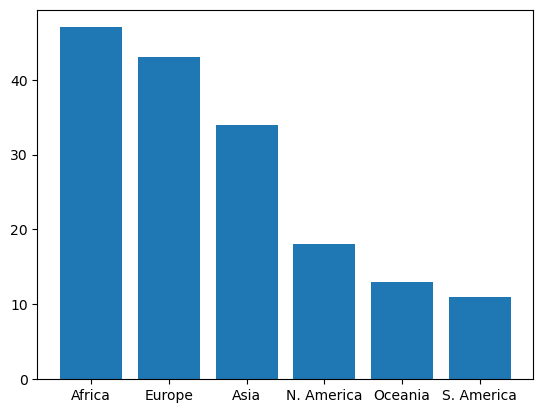

In [23]:
plt.bar(cont.index,cont.values)

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate, however, we will see extraneous text as well:

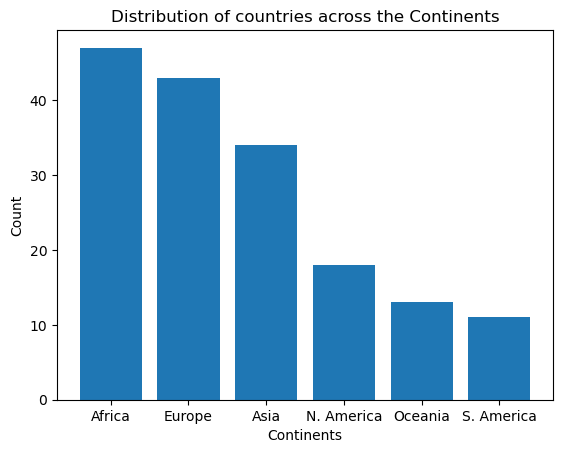

In [31]:
# Code Here
plt.bar(cont.index,cont.values)
plt.xlabel('Continents')
plt.ylabel('Count')
plt.title('Distribution of countries across the Continents')
plt.show()

We also remember to set the axis labels and the title for the plot.

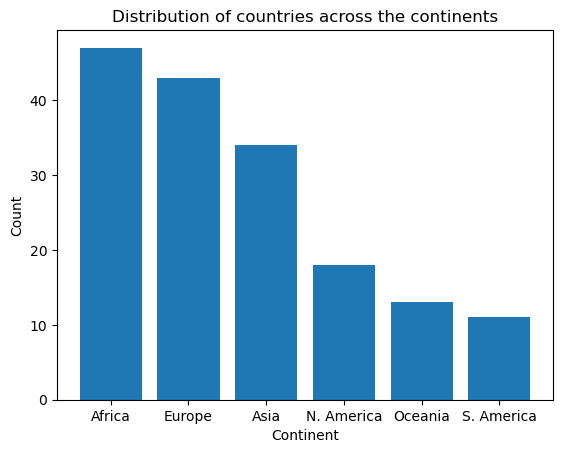

In [ ]:
# Code Here


`pandas` native plotting:

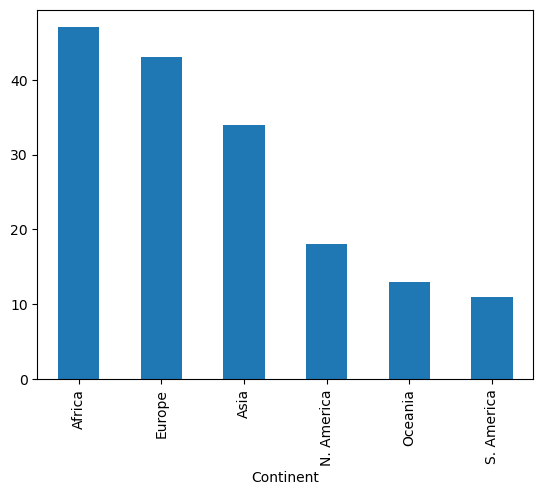

In [ ]:
# Code Here


Equivalently, we could use the `countplot` method of the Seaborn library to create our bar plot.

<Axes: xlabel='Continent', ylabel='count'>

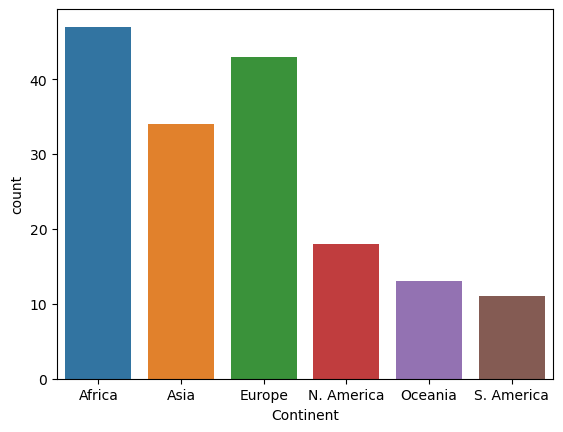

In [35]:
# Code Here
sns.countplot(df,x="Continent")

Above, we said that bar plots should only be used to visualize the distribution of a qualitative (categorical) variable. Why is that? Consider what happens when we try to use `sns.countplot` to visualize a quantitative variable, gross national income per capita.

In [36]:
 df.iloc[[5,7],[16]]

,Population density: people per sq. km: 2016
5,50.0
7,11.0


<Axes: xlabel='Gross national income, Atlas method: $ billions: 2016', ylabel='count'>

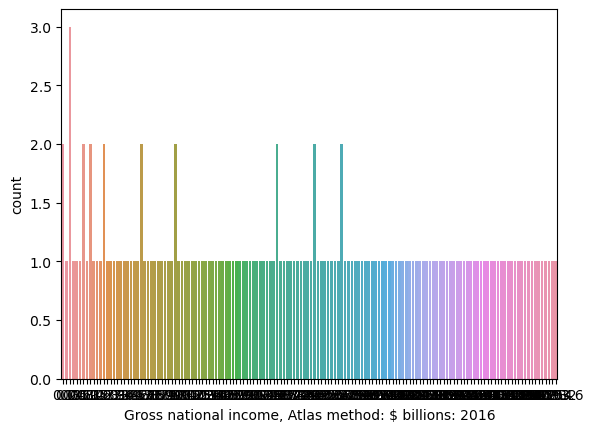

In [38]:
# Code Here
sns.countplot(df,x="Gross national income, Atlas method: $ billions: 2016")

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for *each* unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value.

To visualize the distribution of a continuous variable, we use a different type of plot:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the *density* of the distribution at each possible value.

<Axes: ylabel='Gross national income, Atlas method: $ billions: 2016'>

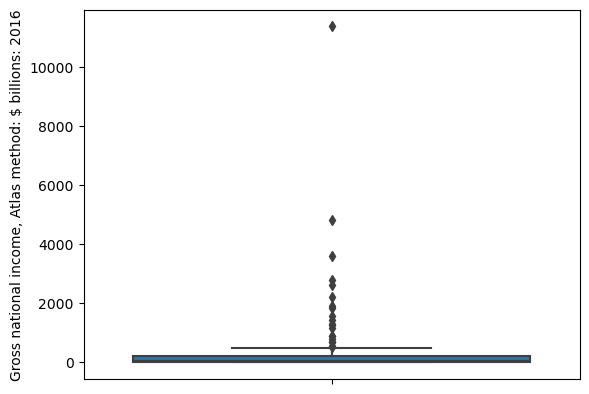

In [40]:
# Code Here, use boxplot
sns.boxplot(df,y='Gross national income, Atlas method: $ billions: 2016')

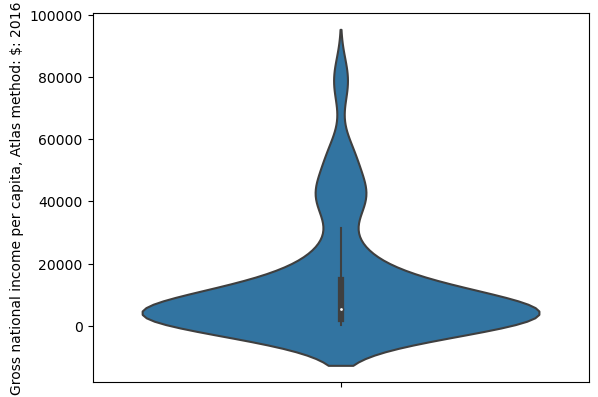

In [42]:
# Code Here, Use voilinplot
sns.violinplot(data=df, y ="Gross national income per capita, Atlas method: $: 2016");

A quartile represents a 25% portion of the data. We say that:
* The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile
* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies *between* the first and third quartiles. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

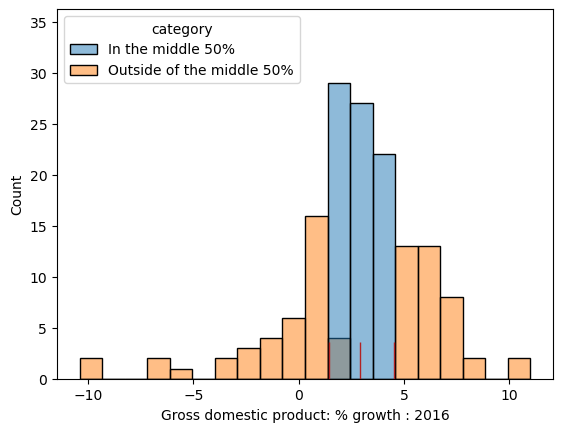

In [51]:
# Code Here
gdp = df['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]
q1, q2, q3 = np.percentile(gdp, [25, 50, 75])
wb_quartiles = df.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category");
#sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);
sns.rugplot([q1, q2, q3], c="firebrick",lw=6, height=0.1);

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

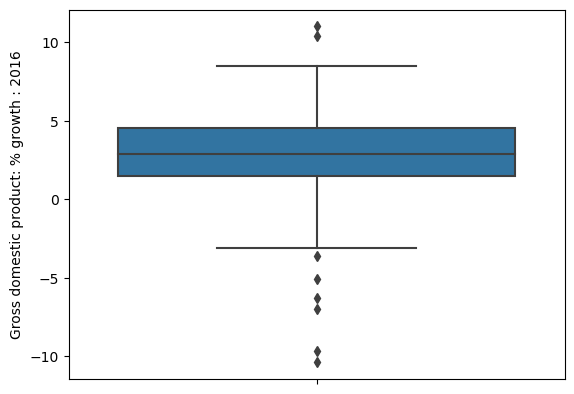

In [52]:
# Code Here
sns.boxplot(data=df, y="Gross domestic product: % growth : 2016");

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

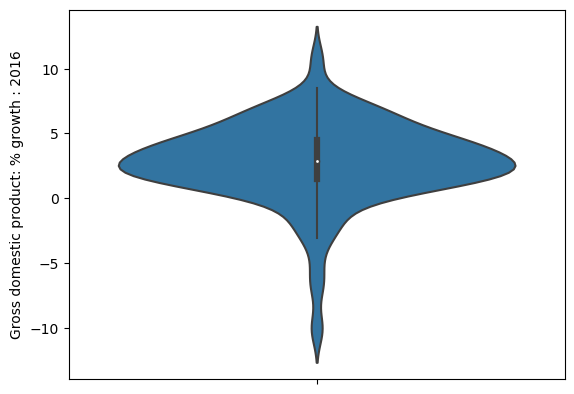

In [53]:
# Code Here
sns.violinplot(data=df, y="Gross domestic product: % growth : 2016");

Plotting side-by-side box or violin plots allow us to compare distributions across different categories. In other words, they enable us to plot *both* a qualitative variable and a quantitative continuous variable in one visualization.

Seaborn allows us to easily create side-by-side plots by specify both an `x` and `y` column.

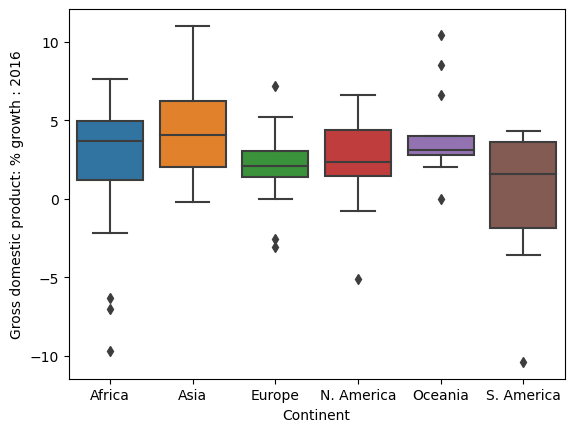

In [54]:
# Code Here
# Code Here
sns.boxplot(data=df, x="Continent", y="Gross domestic product: % growth : 2016");